In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as cte
import matplotlib.pyplot as plt

# Estimate of  superfitial brightness intensity

We want to estimate the brightness using the EM of the observational data for diferents $\lambda$ in the range of JWST.

For this, we want to know if what we see in the free-free emission, so first we estimate the intensity of this emission.

For the Gaunt factor we calculate in a general way by the ec. 10.7 from Draine

$$g_{ff}\approx 6.155(Z\nu_9)^{-0.118}T_4^{0.177}$$

where $\nu_9=\nu/1GHz$ y $T_4=T/10^4K$

In [3]:
def gaunt_factor(Z,nu,T1):
    '''T1 does not have units'''
    T = T1*u.K
    nu_9 = nu.to('Hz')/(1e9*u.Hz)
    T_4 = T/(1e4*u.K)
    return(6.155*((Z*nu_9)**(-0.118))*((T_4)**0.177))


In [4]:
wave_micro = [0.9,1.5,2.1,3.35,4.44,7.7,11,12.5,18] # micrometer
nu = cte.c/((np.array(wave_micro))*u.micrometer)    

First we take the intensity from Rybicki ec. 5.14b

The emissivity is:

$$\epsilon = 6.8\times 10^{38}Z^2T^{-1/2}n_en_i e^{-h\nu/kT}g_{ff}$$

with units $\frac{erg}{s cm^3 Hz}$.

To have the units of $sr$ we divide by $4\pi$. If we assuming that $n_e=n_i$ and using the EM we have that

$$I_\nu=\int j_\nu dz=\frac{EM}{4\pi} 6.8\times 10^{38}Z^2T^{-1/2} e^{-h\nu/kT}g_{ff}$$

with units of  $Jy/sr$ an later we convert to $MJy/sr$.

In [5]:
def intensity(EM,Z,T,lamb,):
    '''lambda must have lengths units'''
    '''T does not have units'''
    nu =cte.c/(lamb)
    g_ff = gaunt_factor(Z,nu,T)
    exp = np.exp(-cte.h*nu/(cte.k_B*T*u.K))
    return (EM*(6.8e-38)/(4*np.pi)*Z**2*(T**(-1/2))*exp*g_ff*u.erg/(u.second*(u.cm)**3*u.Hz*u.sr)*u.cm)

In [6]:
from astropy.table import QTable
'''Here we import the EM and others parameters'''
'''Our EM units are pc cm^-6'''

tab = QTable.read("/home/roberto/globule-seminario/m1-67/m1-67-globule-parameters.ecsv")
#tab = QTable.read("../m1-67/m1-67-globule-parameters.ecsv") the ... the direction in our server
df = tab.to_pandas()
D = 5429*u.pc                      # conversation with Jane
v_inf = 710*u.km*(1/u.second)      # Hanmman
M_loss = (2.0E-5)*u.M_sun*(1/u.yr) #Crowther 1999
L = 10**(49.1)*(1/u.second)        # Hanmman
E = (6.61E-27*2.99E10)/(6.563E-5)*(u.erg)
EM = (df['Bshell'])*(0.0137*4*np.pi)/(3.61E5*E)*(u.pc/(u.cm**5))
EM
l = 2*(df['Rshell']*df['Hshell'])**(1/2)*D*4.84814e-6 #factor to converto to cm
l
n = (EM/(l))**(1/2)

/home/roberto/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


conversion factor to $\frac{MJy}{sr}$

In [7]:
convert_to_MJy_sr = 1*u.MJy/(1*u.sr)

To convert the EM in $cm^{-5}$ we multiply by $3.086\times10^{18}$

In [8]:
intensity(EM[2]*3.086e18,1,6000,0.9*u.micrometer).to(convert_to_MJy_sr)

<Quantity 0.12176988 MJy / sr>

(array([23., 33., 17., 13., 11.,  5.,  7.,  3.,  0.,  4.]),
 array([  5978.9763341 ,  20158.82153433,  34338.66673456,  48518.51193479,
         62698.35713503,  76878.20233526,  91058.04753549, 105237.89273572,
        119417.73793595, 133597.58313618, 147777.42833641]),
 <BarContainer object of 10 artists>)

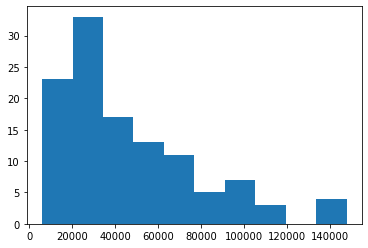

In [10]:
plt.hist(EM)

In the histogram we see that a tipic value is $\sim 30000$, so we use the data with index 167

In [11]:
'''The intensity at 9 micrometer'''
intensity(EM[167]*3.086e18,1,6000,0.9*u.micrometer).to(convert_to_MJy_sr)

<Quantity 0.05913974 MJy / sr>

In [13]:
for i in wave_micro:
    print('at', i,rf'$\mu $m   the intensity is:', intensity(EM[167]*3.086e18,1,6000,i*u.micrometer).to(convert_to_MJy_sr))

at 0.9 $\mu $m   the intensity is: 0.05913974361805958 MJy / sr
at 1.5 $\mu $m   the intensity is: 0.18235243176246824 MJy / sr
at 2.1 $\mu $m   the intensity is: 0.29958540666495975 MJy / sr
at 3.35 $\mu $m   the intensity is: 0.48472672286052876 MJy / sr
at 4.44 $\mu $m   the intensity is: 0.5973798352610536 MJy / sr
at 7.7 $\mu $m   the intensity is: 0.8012538212595678 MJy / sr
at 11 $\mu $m   the intensity is: 0.9175366188622557 MJy / sr
at 12.5 $\mu $m   the intensity is: 0.9561706565233719 MJy / sr
at 18 $\mu $m   the intensity is: 1.0584714639725215 MJy / sr
